In [11]:
import numpy as np
import matplotlib.pyplot as plt
import x_sites
import importlib
# importlib.reload(x_sites)

In [12]:
ops = x_sites.make_local_ops()
cdag = ops['c^+']
c = ops['c^-']
I = ops['I']
F = ops['F']

In [13]:
t = 1.0
U = 4.0
mu = U/2.0
L = 4
Cdag = {}
C = {}
N = {}
Cdag['u'] = [x_sites.make_matrix(
    [I, I]*i + [I, cdag]+[F, F]*(L-1 - i)) for i in range(L)]
Cdag['d'] = [x_sites.make_matrix(
    [I, I]*i + [cdag, F]+[F, F]*(L-1 - i)) for i in range(L)]
for s in ['u', 'd']:
    C[s] = [Cdag[s][i].conj().T for i in range(L)]
    N[s] = [Cdag[s][i]@C[s][i] for i in range(L)]

In [14]:
hamil = np.zeros((4**L, 4**L))
for i in range(L):
    hamil += U*N['u'][i]@N['d'][i] - mu * \
        (N['d'][i] + N['u'][i])
for i in range(L):
    for s in ['u', 'd']:
        hamil += -t/2.0*(Cdag[s][(i+1) % L]@C[s][i] +
                         Cdag[s][i]@C[s][(i+1) % L])

In [15]:
eigval, eigvec = np.linalg.eigh(hamil)

In [16]:
omegamesh = 100
omega_min = -10.0
omega_max = 10.0
omegas = [omega_min + (-omega_min + omega_max)*iomega /
          omegamesh for iomega in range(omegamesh)]

G0jomega = []
for omega in omegas:
    print(omega)
    G0j = []
    for i in range(L):
        G0j.append(x_sites.make_PES(eigval, eigvec, Cdag['d'][i], C['d'][0], omega) + x_sites.make_BIS(
            eigval, eigvec, C['d'][i], Cdag['d'][0], omega))
    G0jomega.append(G0j)
G0jomega = np.array(G0jomega)

-10.0
-9.8
-9.6
-9.4
-9.2
-9.0
-8.8
-8.6
-8.4
-8.2
-8.0
-7.8
-7.6
-7.4
-7.2
-7.0
-6.8
-6.6
-6.4
-6.2
-6.0
-5.8
-5.6
-5.4
-5.2
-5.0
-4.8
-4.6
-4.4
-4.2
-4.0
-3.8
-3.5999999999999996
-3.4000000000000004
-3.2
-3.0
-2.8
-2.5999999999999996
-2.4000000000000004
-2.2
-2.0
-1.8000000000000007
-1.5999999999999996
-1.4000000000000004
-1.1999999999999993
-1.0
-0.8000000000000007
-0.5999999999999996
-0.40000000000000036
-0.1999999999999993
0.0
0.1999999999999993
0.40000000000000036
0.5999999999999996
0.8000000000000007
1.0
1.1999999999999993
1.4000000000000004
1.5999999999999996
1.8000000000000007
2.0
2.1999999999999993
2.4000000000000004
2.5999999999999996
2.8000000000000007
3.0
3.1999999999999993
3.4000000000000004
3.5999999999999996
3.8000000000000007
4.0
4.199999999999999
4.4
4.6
4.800000000000001
5.0
5.199999999999999
5.4
5.6
5.800000000000001
6.0
6.199999999999999
6.399999999999999
6.600000000000001
6.800000000000001
7.0
7.199999999999999
7.399999999999999
7.600000000000001
7.800000000000001

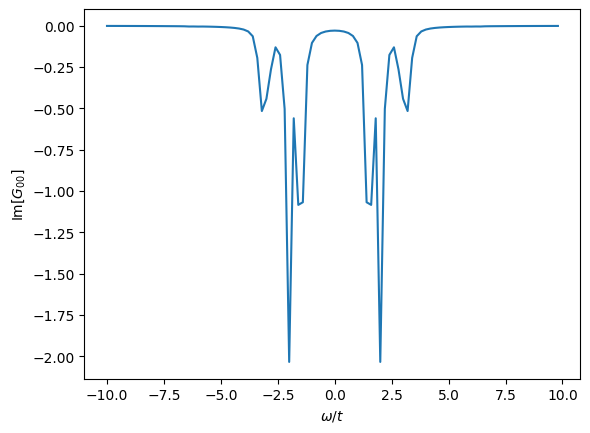

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('$\omega/t$')
ax.set_ylabel(r'Im[$G_{00}$]')
ax.plot(omegas, G0jomega[:, 0].imag)

Text(0.5, 0.98, "Real space Green's function")

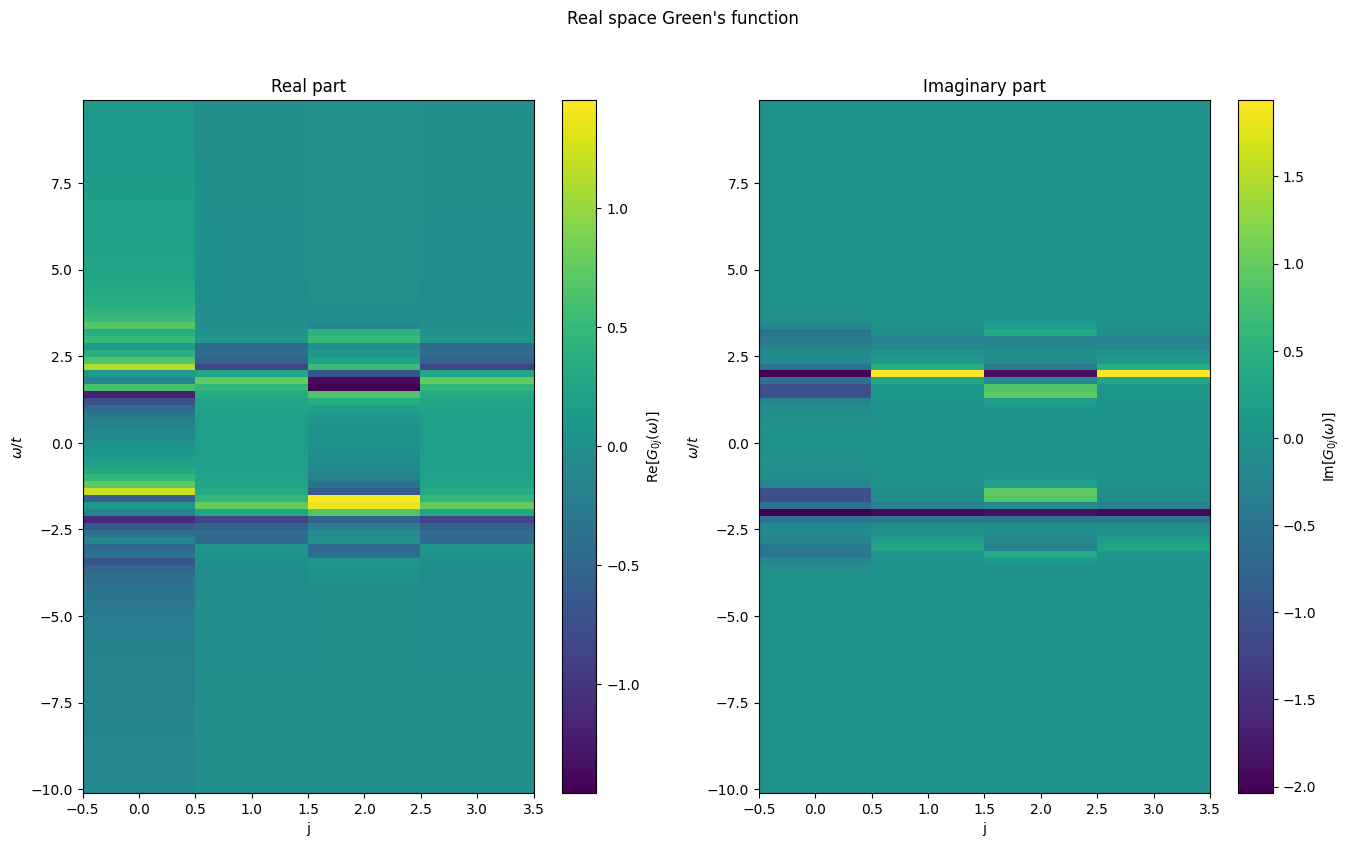

In [18]:
sites = [i for i in range(L)]
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
mappable0 = axs[0].pcolor(sites, omegas, G0jomega.real)
mappable1 = axs[1].pcolor(sites, omegas, G0jomega.imag)
fig.colorbar(mappable0, label='Re[$G_{0j}(\omega)$]')
fig.colorbar(mappable1, label='Im[$G_{0j}(\omega)$]')
axs[0].set_xlabel('j')
axs[0].set_ylabel('$\omega/t$')
axs[0].set_title('Real part')
axs[1].set_xlabel('j')
axs[1].set_ylabel('$\omega/t$')
axs[1].set_title('Imaginary part')
fig.suptitle("Real space Green's function")

In [19]:
ks = [np.pi*(2*ik/L) for ik in range(L+1)]
Gkomega = x_sites.make_Gkomega(G0jomega, ks)

Text(0.5, 0.98, "Reciprocal space Green's function")

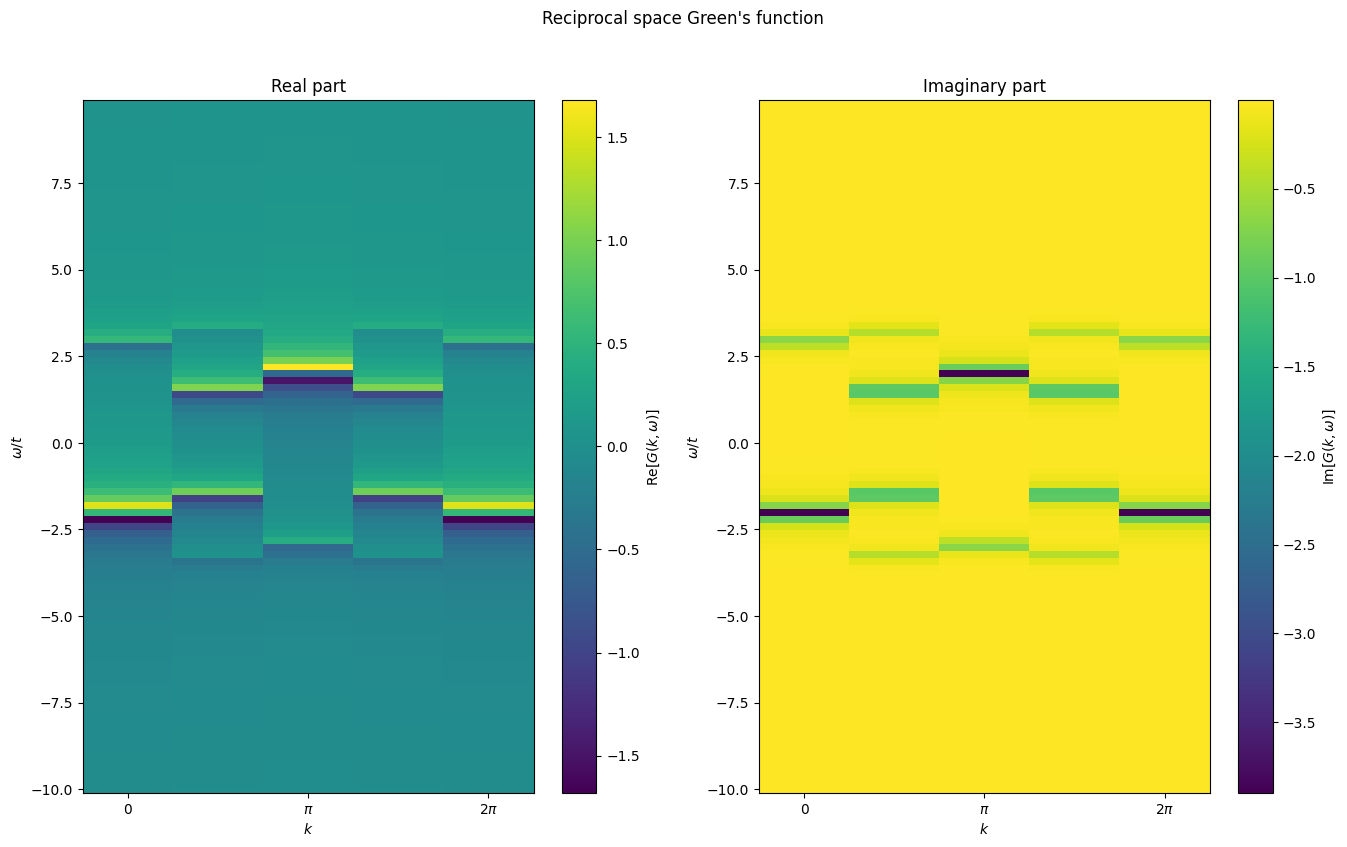

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
mappable0 = axs[0].pcolor(ks, omegas, Gkomega.real)
mappable1 = axs[1].pcolor(ks, omegas, Gkomega.imag)
fig.colorbar(mappable0, label='Re[$G(k,\omega)$]')
fig.colorbar(mappable1, label='Im[$G(k,\omega)$]')

axs[0].set_xticks([0, np.pi, 2*np.pi])
axs[0].set_xticklabels([0, '$\pi$', '$2\pi$'])
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$\omega/t$')
axs[0].set_title('Real part')
axs[1].set_xticks([0, np.pi, 2*np.pi])
axs[1].set_xticklabels([0, '$\pi$', '$2\pi$'])
axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\omega/t$')
axs[1].set_title('Imaginary part')
fig.suptitle("Reciprocal space Green's function")